In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#converting .mat into .csv and reading in the data
import scipy.io as sio
test = sio.loadmat('h1june9_2.mat')
for i in test:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("h1june9_2.csv"),test[i],delimiter=',')

In [21]:
df = pd.read_csv('h1june9_2.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   1.157332102783830807e+00  199999 non-null  float64
 1   2.456466577967537201e+00  199999 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB
None
       1.157332102783830807e+00  2.456466577967537201e+00
count             199999.000000             199999.000000
mean                   2.502909                  2.504827
std                    0.105751                  0.109387
min                    1.780087                  1.913652
25%                    2.448242                  2.448900
50%                    2.503182                  2.505484
75%                    2.558779                  2.562398
max                    3.028560                  3.041062


In [22]:
df.to_csv("h1june9_2.csv",index=False)

In [23]:
df.head()

,1.157332102783830807e+00,2.456466577967537201e+00
0,1.780087,2.457454
1,2.132752,2.463046
2,2.312045,2.482456
3,2.407120,2.505813
4,2.466336,2.519301


In [24]:
df.columns=["AP1","AP2"]
df.head()

,AP1,AP2
0,1.780087,2.457454
1,2.132752,2.463046
2,2.312045,2.482456
3,2.407120,2.505813
4,2.466336,2.519301


Creating time array

In [25]:
f = 20000
t_end = len(df)/20000
t = np.linspace(0,t_end,len(df))
df['t'] = t

In [26]:
resp = df['AP1']    #action potential recording
raster = np.zeros_like(resp)

In [27]:
time_end = len(resp)/20000 #x axis
time = np.linspace(0,time_end,len(resp))

In [33]:
for i in range(1,len(resp)): #raster plot taken from action potentials
    if resp[i-1]<2.8 and resp[i]>2.8:
        raster[i]=1;

In [34]:
#Spike rate
isi = np.zeros_like(resp)

In [35]:
prev_i = 0    #inter spike interval frequency gives spike rate
fs=20000
for i in range(1,len(resp)):
    if raster[i]==1:
        f=fs/(i-prev_i)
        isi[prev_i:i]=f
        prev_i=i

In [36]:
#MA filter for ISI
N=1000
rolling_mean  = np.convolve(isi, np.ones(N)/N, mode='valid')
MA_t = np.linspace(0,len(rolling_mean)/20000,len(rolling_mean))

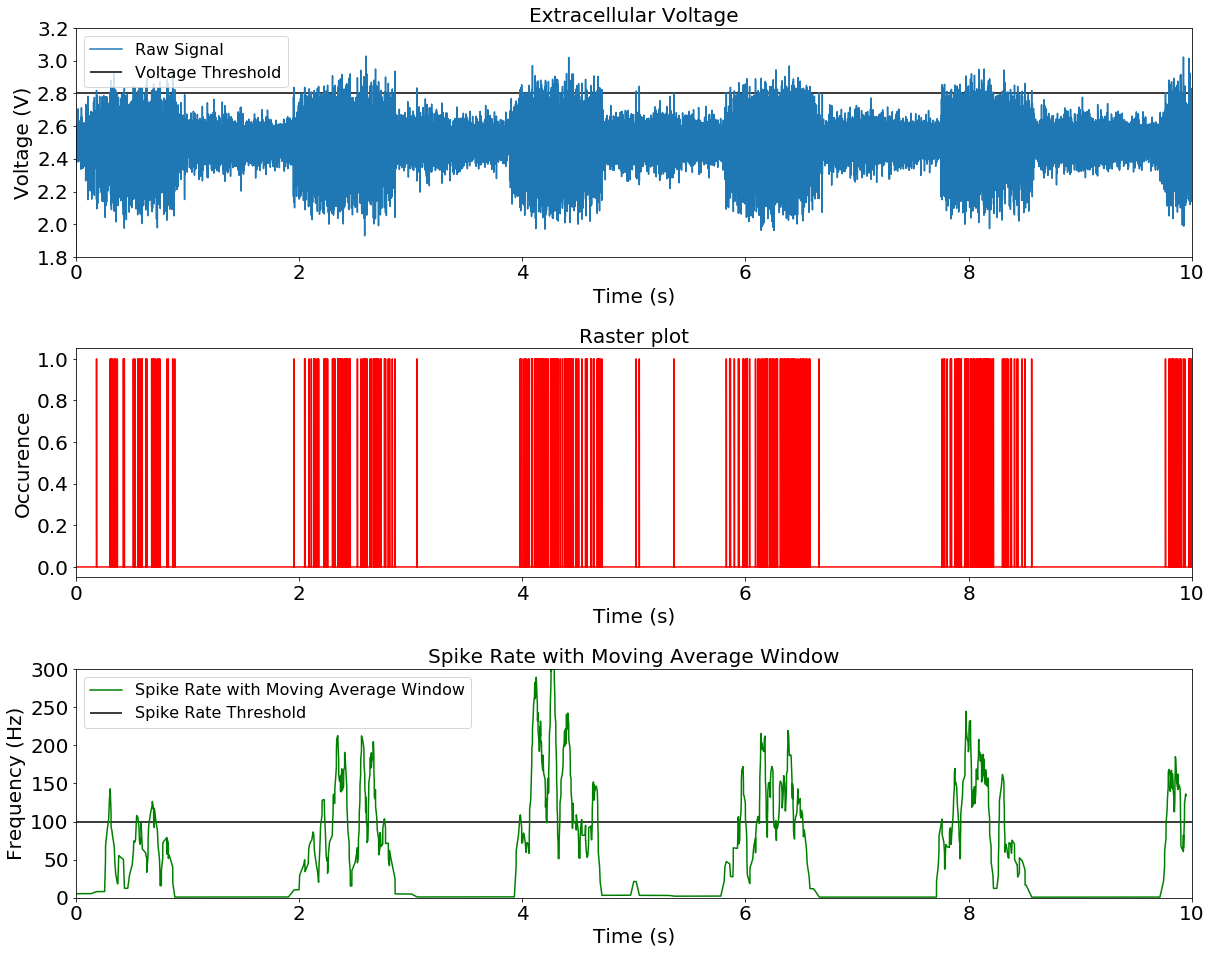

In [37]:
plt.figure(figsize=(20,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.subplot(3,1,1)
plt.plot(time,resp,label='Raw Signal')
plt.xlim([0,10])
plt.ylim([1.8,3.2])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.title('Extracellular Voltage',fontsize=20)
plt.hlines(2.8,0,10,colors='black',linestyles='solid',label='Voltage Threshold')
plt.legend(loc="upper left",fontsize=16)

plt.subplot(3,1,2)
plt.plot(time,raster,color='red')
plt.xlim([0,10])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Occurence',fontsize=20)
plt.title('Raster plot',fontsize=20)

plt.subplot(3,1,3)
plt.plot(MA_t,rolling_mean,color='green',label='Spike Rate with Moving Average Window')
plt.xlim([0,10])
plt.ylim([0,300])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Frequency (Hz)',fontsize=20)
plt.title('Spike Rate with Moving Average Window',fontsize=20)
plt.hlines(100,0,10,colors='black',linestyles='solid',label='Spike Rate Threshold')
plt.legend(loc="upper left",fontsize=16)

Text(0.5, 1.0, 'Instantaneous Spike Rate')

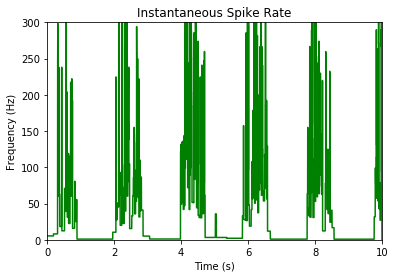

In [30]:
plt.subplot(4,1,4)
plt.plot(MA_t,rolling_mean,color='magenta')
plt.xlim([0,10])
plt.ylim([0,400])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spike Rate, MA Filter, N=1000')